## A comparison of PlotRt (ours) and EpiEstim (Cori et al) methods for computing Rt for various scenarios

Authors: Eilif Muller

In [18]:
import pickle
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

import covid19sim

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

#import sys
#sys.path.append("../plots")
from covid19sim.plotting.plot_rt import PlotRt
from utils import plot_intervention
import datetime

An unmitigated simulation with serial interval fix

In [2]:
filename = "../exp/sim_v2_people-1000_days-30_init-0.002_seed-1000_20200602-232336/tracker_data_n_1000_seed_1000_20200602-233050_.pkl"

In [3]:
with open(filename, "rb") as f:
            data = pickle.load(f)

In [4]:
data.keys()

dict_keys(['intervention_day', 'intervention', 'risk_model', 'expected_mobility', 'serial_interval', 'all_serial_intervals', 'generation_times', 'mobility', 'n_init_infected', 'contacts', 'cases_per_day', 'ei_per_day', 'r_0', 'R', 'n_humans', 's', 'e', 'i', 'r', 'avg_infectiousness_per_day', 'risk_precision_global', 'risk_precision', 'human_monitor', 'infection_monitor', 'infector_infectee_update_messages', 'risk_attributes', 'feelings', 'rec_feelings', 'outside_daily_contacts', 'test_monitor', 'encounter_distances', 'effective_contacts_since_intervention', 'effective_contacts_all_days', 'humans_state', 'humans_rec_level'])

In [5]:
si = data['all_serial_intervals']

In [6]:
len(si)

223

In [7]:
si = np.array(si)

In [8]:
si.mean()

4.023807299451919

In [9]:
si.std()

2.302133912818526

Text(0.5, 0, 'serial interval (days)')

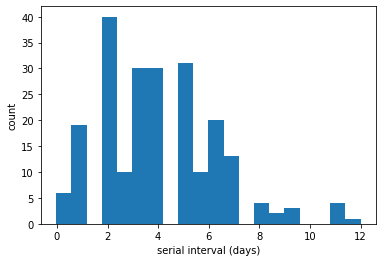

In [10]:
plt.hist(si,bins=20)
plt.ylabel('count')
plt.xlabel('serial interval (days)')

In [11]:
si.min()

-0.02847222222222222

In [12]:
im = data['infection_monitor']

In [13]:
im[0]

{'from': 'human:562',
 'from_risk': 0.01,
 'from_risk_level': 0,
 'from_rec_level': -1,
 'from_infection_timestamp': datetime.datetime(2020, 2, 28, 0, 0),
 'from_is_asymptomatic': False,
 'to': 'human:563',
 'to_risk': 0.01,
 'to_risk_level': 0,
 'to_rec_level': -1,
 'infection_date': datetime.date(2020, 3, 1),
 'infection_timestamp': datetime.datetime(2020, 3, 1, 20, 28),
 'to_is_asymptomatic': False,
 'location': 'household:166'}

In [14]:
df = pd.DataFrame(im)

In [15]:
df["generation_time"] = (df['infection_timestamp'] - df['from_infection_timestamp']).dt.total_seconds()/(24*60*60)

In [19]:
df['infection_day'] = (df['infection_timestamp'] - datetime.datetime(2020, 2, 28, 0, 0)).dt.total_seconds()/(24*60*60)

In [20]:
df

,from,from_risk,from_risk_level,from_rec_level,from_infection_timestamp,from_is_asymptomatic,to,to_risk,to_risk_level,to_rec_level,infection_date,infection_timestamp,to_is_asymptomatic,location,generation_time,infection_day
0,human:562,0.01,0.0,-1.0,2020-02-28 00:00:00,False,human:563,0.01,0,-1,2020-03-01,2020-03-01 20:28:00,False,household:166,2.852778,2.852778
1,human:675,0.01,0.0,-1.0,2020-02-28 00:00:00,False,human:797,0.01,0,-1,2020-03-02,2020-03-02 11:26:00,False,workplace:5,3.476389,3.476389
2,human:675,0.01,0.0,-1.0,2020-02-28 00:00:00,False,human:674,0.01,0,-1,2020-03-03,2020-03-03 20:57:00,True,household:234,4.872917,4.872917
3,human:797,0.01,0.0,-1.0,2020-03-02 11:26:00,False,human:855,0.01,0,-1,2020-03-04,2020-03-04 07:43:00,False,workplace:5,1.845139,5.321528
4,human:797,0.01,0.0,-1.0,2020-03-02 11:26:00,False,human:694,0.20,3,-1,2020-03-04,2020-03-04 08:32:00,False,workplace:5,1.879167,5.355556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,human:12,0.01,0.0,-1.0,2020-03-27 09:49:00,True,human:231,0.01,0,-1,2020-03-28,2020-03-28 20:22:00,False,household:11,1.439583,29.848611
681,human:53,0.01,0.0,-1.0,2020-03-23 13:10:00,False,human:341,0.01,0,-1,2020-03-28,2020-03-28 21:01:00,False,household:52,5.327083,29.875694
682,human:505,0.01,0.0,-1.0,2020-03-25 16:10:00,False,human:160,0.01,0,-1,2020-03-28,2020-03-28 22:14:00,False,household:134,3.252778,29.926389
683,human:247,0.01,0.0,-1.0,2020-03-27 07:54:00,True,human:248,0.01,0,-1,2020-03-28,2020-03-28 22:22:00,False,household:9,1.602778,29.931944


In [21]:
df_human = df[df['from'].isnull()==False]

In [22]:
len(df_human)

648

In [23]:
df_human['generation_time'].mean()

4.552877443415638

In [24]:
df_human['generation_time'].std()

2.398564086689553

Text(0, 0.5, 'count')

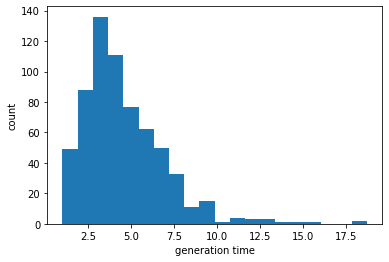

In [25]:
plt.hist(df_human['generation_time'], bins=20)
plt.xlabel('generation time')
plt.ylabel('count')

In [26]:
inf_days = df_human['infection_day']

In [27]:
cases_per_day = np.histogram(inf_days, bins=np.arange(31))[0]

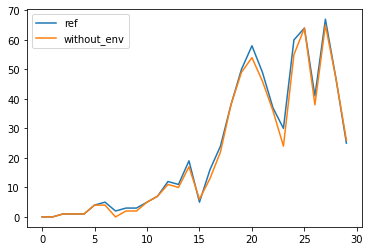

In [28]:
plt.plot(np.arange(30),data['cases_per_day'], label='ref')
plt.plot(np.arange(30),cases_per_day, label='without_env')
plt.legend()

In [29]:
t_start = datetime.datetime(2020, 2, 28, 0, 0)
t_mid = t_start+datetime.timedelta(days=20)

In [30]:
df_after_mid = df[df['from_infection_timestamp']>=t_mid]

In [31]:
gt = df_after_mid[df_after_mid.notna()]['generation_time']

In [32]:
len(gt)

247

In [33]:
gt.mean()

3.8530139451192085

In [34]:
gt.std()

1.5969104659178612

### "Fit" the gamma, based on stats

In [35]:
import scipy.stats

In [36]:
gamma = lambda x, a, b: scipy.stats.gamma.pdf(x,a, loc=1, scale=b)

In [37]:
mu = np.mean(np.array(gt)-1)

In [38]:
sigma = np.std(np.array(gt)-1)

In [39]:
scale = sigma**2/mu

In [40]:
k = mu**2/sigma**2

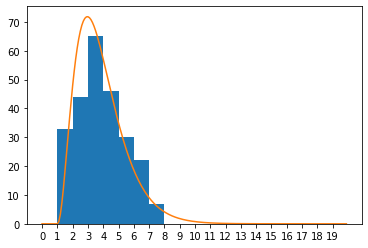

In [41]:
plt.hist(gt, bins=np.arange(0,20))
plt.xticks(range(20))
x = np.arange(0,20,0.1)
plt.plot(x ,len(gt)*gamma(x, k, scale))

## R estimation comparison EpiEstim vs PlotRt

In [42]:
import rpy2
import rpy2.robjects.packages as rpackages
import rpy2.robjects as robj

In [43]:
epiestim = rpackages.importr('EpiEstim')

In [44]:
from rpy2.robjects import numpy2ri
numpy2ri.activate()

In [45]:
R_cases_per_day = robj.IntVector(cases_per_day)

In [46]:
R_cases_per_day

0,0,1,...,65,47,26


In [47]:
len(R_cases_per_day)

30

In [48]:
res = epiestim.estimate_R(R_cases_per_day, method='parametric_si', config=epiestim.make_config(mean_si = si.mean(), std_si = si.std()))

R[write to console]: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 



In [50]:
tmp = epiestim.plot_estimate_R(res, what='all')

![title](img/EpiEstim_Unmitigated_1000ppl.png)

In [51]:
res[0]['Mean(R)']

array([3.34176404, 2.45698442, 1.96985609, 2.01744682, 2.2267749 ,
       2.34527286, 2.22505821, 2.55830561, 2.16208582, 2.00118212,
       2.02746941, 2.27151042, 2.43818663, 2.45617652, 2.17583511,
       1.93036041, 1.64020339, 1.56150457, 1.49047679, 1.28485038,
       1.21114153, 1.14192097, 1.05856994])

In [52]:
res[0]['Quantile.0.05(R)']

array([1.92825703, 1.48541161, 1.21426269, 1.32110405, 1.54824326,
       1.7074651 , 1.66644612, 2.01854098, 1.72084235, 1.62466452,
       1.683662  , 1.93884236, 2.12622072, 2.17765208, 1.94485634,
       1.73739272, 1.47954022, 1.41693856, 1.35793894, 1.1686784 ,
       1.10344305, 1.04052866, 0.96315094])

In [53]:
res[0]['Quantile.0.95(R)']

array([5.07043471, 3.62731086, 2.87421517, 2.83416985, 3.00636018,
       3.0662706 , 2.85015231, 3.15090636, 2.64495786, 2.41018021,
       2.39775788, 2.62605633, 2.76791745, 2.74866089, 2.41761476,
       2.13180075, 1.80777243, 1.71192919, 1.6281649 , 1.40561565,
       1.32302505, 1.24724716, 1.15774964])

## Discrete serial interval distribution

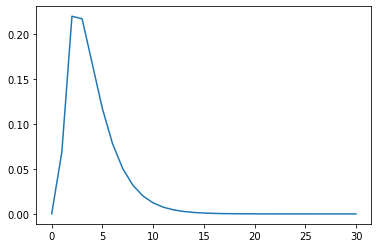

In [54]:
plt.plot(res[2])

In [55]:
sum(res[2])

0.9999992419541766

In [56]:
plotrt = PlotRt(R_T_MAX=4, sigma=0.25, GAMMA=1.0/si.mean())
most_likely, _ = plotrt.compute(cases_per_day, r0_estimate=2.5)

## R estimate by counting secondary infections
Note: is a slight underestimation because a small fraction of 'from' humans may still be infectious at end of simulation 

In [62]:
R_by_count = df_after_mid.groupby('from')['to'].count().mean()

In [61]:
df.groupby('from')['to'].count().mean()

2.417910447761194

In [65]:
t = np.arange(30)

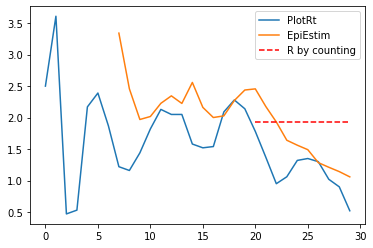

In [67]:
plt.plot(t, most_likely, label='PlotRt')
plt.plot(t[7:],res[0]['Mean(R)'], label='EpiEstim')
plt.plot(t[20:], np.ones_like(t[20:])*R_by_count, 'r--', label='R by counting')
plt.legend()

## R=2 comparison EpiEstim vs PlotRt

In [68]:
import synthRdata

In [69]:
t = np.arange(50.)

In [70]:
Rt = np.ones_like(t)*2.0

In [71]:
si_dist = np.array(res[2])

In [72]:
sum(si_dist*np.arange(31))

4.023783518995574

In [73]:
si.mean()

4.023807299451919

In [74]:
si_dist

array([0.00000000e+00, 6.84629308e-02, 2.19558679e-01, 2.16776288e-01,
       1.66818274e-01, 1.16949401e-01, 7.80164979e-02, 5.04576194e-02,
       3.19496972e-02, 1.99210387e-02, 1.22762436e-02, 7.49575510e-03,
       4.54291119e-03, 2.73646886e-03, 1.63988963e-03, 9.78453914e-04,
       5.81610001e-04, 3.44589175e-04, 2.03574444e-04, 1.19961079e-04,
       7.05298741e-05, 4.13831037e-05, 2.42368862e-05, 1.41712728e-05,
       8.27339276e-06, 4.82344551e-06, 2.80853182e-06, 1.63340179e-06,
       9.48936006e-07, 5.50738389e-07, 0.00000000e+00])

In [75]:
cases = synthRdata.generate_synthetic_cases_per_day(t, Rt, 2, si_dist)

In [76]:
cases

array([  2.,   0.,   0.,   0.,   3.,   0.,   1.,   2.,   2.,   1.,   3.,
         1.,   1.,   1.,   0.,   3.,   3.,   1.,   5.,   3.,   2.,   7.,
         6.,   9.,   6.,  14.,  16.,  15.,  16.,  25.,  27.,  26.,  31.,
        45.,  44.,  50.,  58.,  59.,  82.,  79., 103., 125., 142., 179.,
       180., 239., 254., 304., 355., 420.])

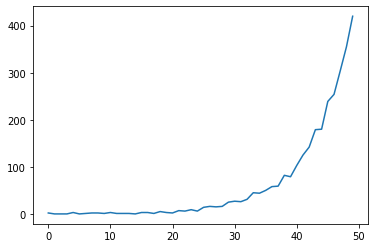

In [77]:
plt.plot(t, cases)

In [78]:
R_cases_per_day = robj.IntVector(cases)

In [79]:
R_cases_per_day

2,0,0,...,304,355,420


In [80]:
si.mean()

4.023807299451919

In [81]:
res = epiestim.estimate_R(R_cases_per_day, method='parametric_si', config=epiestim.make_config(mean_si = si.mean(), std_si = si.std()))

R[write to console]: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 



In [82]:
res[0]['Mean(R)']

array([1.93533975, 2.04505999, 1.94354343, 2.13877636, 1.52353396,
       1.41590078, 1.29432311, 1.00981981, 1.07599289, 1.27941982,
       1.06959537, 1.41550994, 1.56284546, 1.52506189, 1.91061161,
       1.89044811, 1.94066675, 1.87641287, 1.94221751, 2.07907888,
       2.09201195, 1.9165839 , 1.93934869, 1.90831976, 1.86059983,
       1.75303342, 1.76415535, 1.75069125, 1.74007921, 1.69427632,
       1.62809089, 1.67043345, 1.65142099, 1.63991506, 1.6776036 ,
       1.70736553, 1.75865547, 1.75515068, 1.77065548, 1.77105033,
       1.76448456, 1.75410192, 1.75592753])

In [83]:
plotrt = PlotRt(R_T_MAX=4, sigma=0.25, GAMMA=1.0/si.mean())
most_likely, _ = plotrt.compute(cases, r0_estimate=2.5)

In [84]:
most_likely.shape

(50,)

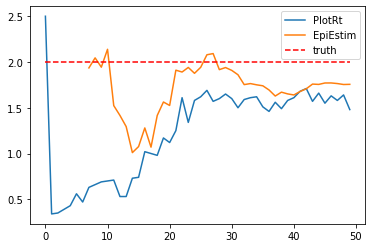

In [85]:
plt.plot(t, most_likely, label='PlotRt')
plt.plot(t[7:], res[0]['Mean(R)'], label='EpiEstim')
plt.plot(t, np.ones_like(t)*2.0, 'r--', label='truth')
plt.legend()

## R=0.9 comparison EpiEstim vs PlotRt

In [86]:
Rt = np.ones_like(t)*0.9

In [87]:
cases = synthRdata.generate_synthetic_cases_per_day(t, Rt, 2000, si_dist)

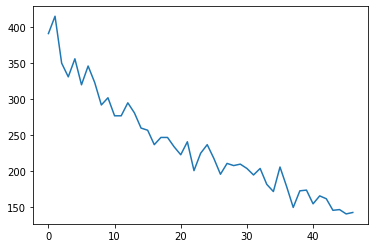

In [88]:
plt.plot(cases[3:])

In [89]:
R_cases_per_day = robj.IntVector(cases)

In [90]:
res = epiestim.estimate_R(R_cases_per_day[3:], method='parametric_si', config=epiestim.make_config(mean_si = si.mean(), std_si = si.std()))

R[write to console]: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 



In [91]:
res[0]['Mean(R)'].shape

(40,)

In [92]:
cases

array([2000.,    0.,  121.,  391.,  415.,  350.,  331.,  356.,  320.,
        346.,  323.,  292.,  302.,  277.,  277.,  295.,  281.,  260.,
        257.,  237.,  247.,  247.,  234.,  223.,  241.,  201.,  225.,
        237.,  218.,  196.,  211.,  208.,  210.,  204.,  195.,  204.,
        182.,  172.,  206.,  179.,  150.,  173.,  174.,  155.,  166.,
        162.,  146.,  147.,  141.,  143.])

In [93]:
plotrt = PlotRt(R_T_MAX=4, sigma=0.25, GAMMA=1.0/si.mean())
most_likely, _ = plotrt.compute(cases[3:], r0_estimate=2.0)

In [94]:
most_likely.shape

(47,)

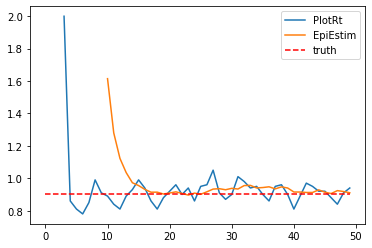

In [95]:
plt.plot(t[3:], most_likely, label='PlotRt')
plt.plot(t[10:], res[0]['Mean(R)'], label='EpiEstim')
plt.plot(t, np.ones_like(t)*0.9, 'r--', label='truth')
plt.legend()

## R=1 comparison EpiEstim vs PlotRt

In [96]:
Rt = np.ones_like(t)

In [97]:
cases = synthRdata.generate_synthetic_cases_per_day(t, Rt, 200, si_dist)

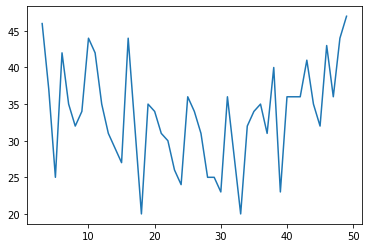

In [98]:
plt.plot(t[3:], cases[3:])

In [99]:
R_cases_per_day = robj.IntVector(cases)

In [100]:
res = epiestim.estimate_R(R_cases_per_day[3:], method='parametric_si', config=epiestim.make_config(mean_si = si.mean(), std_si = si.std()))

R[write to console]: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 



In [101]:
plotrt = PlotRt(R_T_MAX=4, sigma=0.25, GAMMA=1.0/si.mean())
most_likely, _ = plotrt.compute(cases[3:], r0_estimate=2.0)

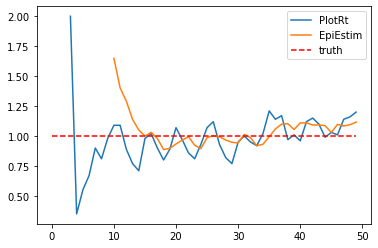

In [102]:
plt.plot(t[3:], most_likely, label='PlotRt')
plt.plot(t[10:], res[0]['Mean(R)'], label='EpiEstim')
plt.plot(t, np.ones_like(t)*1.0, 'r--', label='truth')
plt.legend()

## Step drop from R=2 to R=1 comparison EpiEstim vs PlotRt

In [103]:
t = np.arange(50.)

In [104]:
Rt = np.ones_like(t)

In [105]:
Rt[:30]=2.0
Rt[30:]=0.9

Text(0.5, 0, 'day')

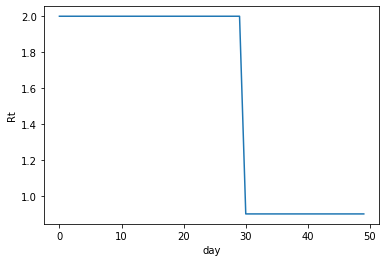

In [106]:
plt.plot(t, Rt)
plt.ylabel('Rt')
plt.xlabel('day')

In [107]:
cases = synthRdata.generate_synthetic_cases_per_day(t, Rt, 20, si_dist)

Text(0.5, 0, 'day')

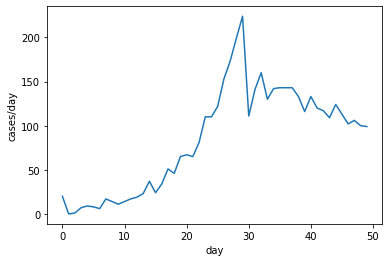

In [108]:
plt.plot(t, cases)
plt.ylabel('cases/day')
plt.xlabel('day')

In [109]:
R_cases_per_day = robj.IntVector(cases)

In [110]:
res = epiestim.estimate_R(R_cases_per_day[3:], method='parametric_si', config=epiestim.make_config(mean_si = si.mean(), std_si = si.std()))

R[write to console]: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 



In [111]:
plotrt = PlotRt(R_T_MAX=4, sigma=0.25, GAMMA=1.0/si.mean())
most_likely, _ = plotrt.compute(cases[3:], r0_estimate=2.0)

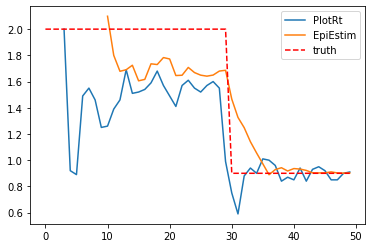

In [112]:
plt.plot(t[3:], most_likely, label='PlotRt')
plt.plot(t[10:], res[0]['Mean(R)'], label='EpiEstim')
plt.plot(t, Rt, 'r--', label='truth')
plt.legend()

## Conclusion

Running and comparing PlotRt (ours) and EpiEstim (a leading impl in the R language) on various synthetic data scenarios with known Rs, and simulated data (with serial interval distribution), we determined the following properties of 

1) PlotRt is noisier than EpiEstim, but EpiEstim responds with a latency of ~5 for a step change in R, whereas PlotRt responds faster  
2) Both PlotRt and EpiEstim correctly/accurately identify the R=1 scenario  
3) For large R, both underestimate R, but EpiEstim generally appears to closer, though the improvement is only ~10%  
4) EpiEstim requires installation of R, EpiEstim, rpy2, which is somewhat non-standard, and involved.

If we want fast readout, use PlotRt.  
If we want scitability, use EpiEstim.  
If we want low noise, use EpiEstim.  
If we want a simple, standalone Rt estimator, use PlotRt.  
